In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import interpolate
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *

import vegas
import gvar as gv

from source import *

In [29]:
############################################################
# integration evaluations
rates.NEVALwarmup = 1e6
rates.NEVAL = 1e6

###########
# NUMU FLUX
fluxfile = "fluxes/b8spectrum.txt"
flux = fluxes.get_neutrino_flux(fluxfile)

############
# NUE/BAR XS
xsfile="xsecs/IBD_160106169/TCS_CC_anue_p_1026_SV.txt"
xsec = lambda x : np.zeros(np.size(x)) 
xsecbar = lambda x: np.ones(np.size(x))*1e-38

bins = np.linspace(0.0,14.5,50)
dx = (bins[1:] - bins[:-1])
bin_c = bins[:-1] + dx/2.0

#############
# efficiencies
enu_eff= bins
eff= np.ones((np.size(bins)-1))
identity = lambda TTT : TTT


In [5]:
###########
# DECAY MODEL PARAMETERS
params = model.decay_model_params(const.SCALAR)
params.gx = 1.0
params.Ue4 = np.sqrt(0.001)
params.Umu4 = np.sqrt(0.001)
params.UD4 = np.sqrt(1.0-params.Ue4*params.Ue4-params.Umu4*params.Umu4)
params.m4 = 300e-9 # GeV

params.mBOSON  = 0.9*params.m4 # GeV
NCASCADE, dNCASCADE = rates.RATES_dN_HNL_CASCADE_NU_NUBAR(\
                                        flux=flux,\
                                        xsec=xsec,\
                                        xsecbar=xsecbar,\
                                        dim=3,\
                                        enumin=0,\
                                        enumax=const.Enu_END_OF_SPECTRUM,\
                                        params=params,\
                                        bins=bins,\
                                        PRINT=True,\
                                        enu_eff=enu_eff,\
                                        eff=eff,
                                        smearing_function=identity)

params.mBOSON  = 0.5*params.m4 # GeV
NCASCADE2, dNCASCADE2 = rates.RATES_dN_HNL_CASCADE_NU_NUBAR(\
                                        flux=flux,\
                                        xsec=xsec,\
                                        xsecbar=xsecbar,\
                                        dim=3,\
                                        enumin=0,\
                                        enumax=const.Enu_END_OF_SPECTRUM,\
                                        params=params,\
                                        bins=bins,\
                                        PRINT=False,\
                                        enu_eff=enu_eff,\
                                        eff=eff,
                                        smearing_function=identity)

params.mBOSON  = 0.1*params.m4 # GeV
NCASCADE3, dNCASCADE3 = rates.RATES_dN_HNL_CASCADE_NU_NUBAR(\
                                        flux=flux,\
                                        xsec=xsec,\
                                        xsecbar=xsecbar,\
                                        dim=3,\
                                        enumin=0,\
                                        enumax=const.Enu_END_OF_SPECTRUM,\
                                        params=params,\
                                        bins=bins,\
                                        PRINT=False,\
                                        enu_eff=enu_eff,\
                                        eff=eff,
                                        smearing_function=identity)


/Users/matheushostert/Repos/solar-neutrino-visible-decays/source/const.py:121: RuntimeWarning: invalid value encountered in sqrt
  p = E*np.sqrt(1.0 - (m/E)**2)


itn   integral         wgt average       chi2/dof        Q
----------------------------------------------------------
  1   1.429570(34)e-35 1.429570(34)e-35      0.00     1.00
  2   1.429559(33)e-35 1.429564(23)e-35      0.90     0.67
  3   1.429512(33)e-35 1.429548(19)e-35      0.97     0.55
  4   1.429521(33)e-35 1.429541(17)e-35      0.92     0.76
  5   1.429602(34)e-35 1.429551(15)e-35      0.92     0.79
  6   1.429566(34)e-35 1.429554(14)e-35      0.89     0.90
  7   1.429586(34)e-35 1.429558(13)e-35      0.84     0.98
  8   1.429642(34)e-35 1.429568(12)e-35      0.85     0.98
  9   1.429548(35)e-35 1.429566(11)e-35      0.86     0.98
 10   1.429469(36)e-35 1.429557(11)e-35      0.91     0.92
 11   1.429539(35)e-35 1.429555(10)e-35      0.93     0.87
 12   1.429554(35)e-35 1.4295548(98)e-35     0.95     0.80
 13   1.429527(35)e-35 1.4295526(94)e-35     0.93     0.89
 14   1.429567(35)e-35 1.4295536(91)e-35     0.96     0.79
 15   1.429583(36)e-35 1.4295554(88)e-35     0.95     0.

In [6]:
###################################3
params.Ue4		= np.sqrt(0.01)
params.mBOSON  = 0.9*params.m4 # GeV
NCASCADE_001, dNCASCADE_001 = rates.RATES_dN_HNL_CASCADE_NU_NUBAR(\
                                        flux=flux,\
                                        xsec=xsec,\
                                        xsecbar=xsecbar,\
                                        dim=3,\
                                        enumin=0,\
                                        enumax=const.Enu_END_OF_SPECTRUM,\
                                        params=params,\
                                        bins=bins,\
                                        PRINT=True,\
                                        enu_eff=enu_eff,\
                                        eff=eff,
                                        smearing_function=identity)

params.mBOSON  = 0.5*params.m4 # GeV
NCASCADE2_001, dNCASCADE2_001 = rates.RATES_dN_HNL_CASCADE_NU_NUBAR(\
                                        flux=flux,\
                                        xsec=xsec,\
                                        xsecbar=xsecbar,\
                                        dim=3,\
                                        enumin=0,\
                                        enumax=const.Enu_END_OF_SPECTRUM,\
                                        params=params,\
                                        bins=bins,\
                                        PRINT=False,\
                                        enu_eff=enu_eff,\
                                        eff=eff,
                                        smearing_function=identity)

params.mBOSON  = 0.1*params.m4 # GeV
NCASCADE3_001, dNCASCADE3_001 = rates.RATES_dN_HNL_CASCADE_NU_NUBAR(\
                                        flux=flux,\
                                        xsec=xsec,\
                                        xsecbar=xsecbar,\
                                        dim=3,\
                                        enumin=0,\
                                        enumax=const.Enu_END_OF_SPECTRUM,\
                                        params=params,\
                                        bins=bins,\
                                        PRINT=False,\
                                        enu_eff=enu_eff,\
                                        eff=eff,
                                        smearing_function=identity)


itn   integral         wgt average      chi2/dof        Q
---------------------------------------------------------
  1   2.608979(59)e-34 2.608979(59)e-34     0.00     1.00
  2   2.609041(60)e-34 2.609008(42)e-34     1.32     0.06
  3   2.608840(62)e-34 2.608954(35)e-34     1.44     0.00
  4   2.609024(62)e-34 2.608970(30)e-34     1.27     0.01
  5   2.608974(64)e-34 2.608970(27)e-34     1.20     0.03
  6   2.608989(59)e-34 2.608974(25)e-34     1.18     0.03
  7   2.608924(62)e-34 2.608967(23)e-34     1.20     0.01
  8   2.608830(65)e-34 2.608951(22)e-34     1.19     0.01
  9   2.609093(63)e-34 2.608966(21)e-34     1.17     0.01
 10   2.608861(66)e-34 2.608957(20)e-34     1.14     0.02
 11   2.608996(65)e-34 2.608959(19)e-34     1.11     0.04
 12   2.609050(66)e-34 2.608966(18)e-34     1.10     0.06
 13   2.608927(65)e-34 2.608963(17)e-34     1.07     0.12
 14   2.608897(66)e-34 2.608959(17)e-34     1.06     0.14
 15   2.608787(69)e-34 2.608949(16)e-34     1.04     0.22
 16   2.608940

In [7]:
## Getting the flux limits from digitzed data

In [279]:
exp = exps.borexino_limit()
Bbin_c = exp.Enu_bin_c
Bbin_w = exp.Enu_bin_w
Bbin_e = exp.Enu_bin_e
Bfluxlimit = exp.fluxlimit
BfluxlimitATM = exp.fluxlimitATM

exp2 = exps.kamland_limit()
Kbin_c = exp2.Enu_bin_c
Kbin_w = exp2.Enu_bin_w
Kbin_e = exp2.Enu_bin_e
Kfluxlimit = exp2.fluxlimit

exp3 = exps.superk_limit()
Sbin_c = exp3.Enu_bin_c
Sbin_w = exp3.Enu_bin_w
Sbin_e = exp3.Enu_bin_e
Sfluxlimit = exp3.fluxlimit


exp4 = exps.kamland21_limit()
K21_bin_c = exp4.Enu_bin_c
K21_bin_w = exp4.Enu_bin_w
K21_bin_e = exp4.Enu_bin_e
K21_fluxlimit = exp4.fluxlimit

exp5 = exps.superk15_limit()
S15_bin_c = exp5.Enu_bin_c
S15_bin_w = exp5.Enu_bin_w
S15_bin_e = exp5.Enu_bin_e
S15_fluxlimit = exp5.fluxlimit


Filling the bins in SUPERK_IV


Filling the bins in SUPERK_IV


(0.0, 49.53540569805299)

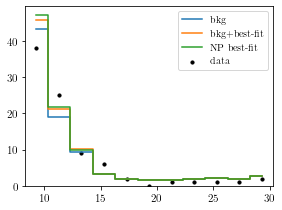

In [28]:
MYEXP = exps.superk_data()
bins_end, NP_MC, back_MC, D = rates.fill_bins_B8_spectrum(MYEXP,fluxfile,endpoint=1e100,startpoint=0)
bins_c = const.get_centers(bins_end)
plt.scatter(bin_c,D, c='black', s=10, label='data')
plt.step(bin_c,MYEXP.MCallbkg, where ='mid', label='bkg')
plt.step(bin_c,MYEXP.MCall, where ='mid', label='bkg+best-fit')
plt.step(bin_c,MYEXP.MCallbkg+NP_MC*8e-5, where ='mid', label='NP best-fit')
# plt.step(bin_c,back_MC+NP_MC*3.6e-4, where ='mid', label='NP')

plt.legend(loc="upper right")
# plt.xlim(8,16)
plt.ylim(0,)

In [186]:
Nbins_end, NNP_MC, Nback_MC, ND = rates.fill_bins_flat( exps.superk_data(), flux_value =1)
Nbins_c = const.get_centers(Nbins_end)
Nflux_limit=[]
for i in range(len(NNP_MC)):
    Nflux_limit.append(stats.get_model_indep_bound_flux(NNP_MC[i], Nback_MC[i], ND[i], err_flux=0.2, err_bkg=0.1, CL=0.90))
    
    
for i in range(len(NNP_MC)):
    new_bound = stats.get_model_indep_bound_flux_FC(NNP_MC[i], Nback_MC[i], ND[i], CL=0.90)

    if (ND[i] < 5 or (Nflux_limit[i] != Nflux_limit[i])):
        Nflux_limit[i] = new_bound
        

Filling the bins in SUPERK_IV


In [195]:
bins_end_old, NP_MC, back_MC, D = rates.fill_bins_flat(exps.superk_outdated_data(), flux_value =1)
bins_c_old = const.get_centers(bins_end_old)
flux_limit_old=[]

for i in range(len(NP_MC)):
    flux_limit_old.append(stats.get_model_indep_bound_flux(NP_MC[i], back_MC[i], D[i], err_flux=0.1, err_bkg=0.1))
    
# for i in range(len(NP_MC)):
#     new_bound = stats.get_model_indep_bound_flux_FC(NP_MC[i], back_MC[i], D[i], err_flux=0.1, err_bkg=0.1)

#     if (D[i] < 5 or (flux_limit_old[i] != flux_limit_old[i])):
#         flux_limit_old[i] = new_bound
        


Filling the bins in SUPERK_IV_DEPRECATED


In [188]:
bins_end_bor, NP_MC, back_MC, D = rates.fill_bins_flat(exps.borexino_data(), flux_value =1)
bins_c_bor = const.get_centers(bins_end_bor)
flux_limit_bor=[]
for i in range(len(NP_MC)):
    flux_limit_bor.append(stats.get_model_indep_bound_flux(NP_MC[i], back_MC[i], D[i], err_flux=0.1, err_bkg=0.1))

for i in range(len(NP_MC)):
    new_bound = stats.get_model_indep_bound_flux_FC(NP_MC[i], back_MC[i], D[i], err_flux=0.1, err_bkg=0.1)
    if (D[i] < 1 or (flux_limit_bor[i] != flux_limit_bor[i])):
        flux_limit_bor[i] = new_bound

Filling the bins in borexino


In [189]:
Kbins_end, KNP_MC, Kback_MC, KD = rates.fill_bins_flat( exps.kamland_data(), flux_value =1)
Kbins_c = const.get_centers(Kbins_end)
Kflux_limit=[]
for i in range(len(KNP_MC)):
    Kflux_limit.append(stats.get_model_indep_bound_flux(KNP_MC[i], Kback_MC[i], KD[i], err_flux=0.1, err_bkg=0.1, CL=0.90))
    
    
for i in range(len(KNP_MC)):
    new_bound = stats.get_model_indep_bound_flux_FC(KNP_MC[i], Kback_MC[i], KD[i], CL=0.90)

    if (KD[i] < 5 or (Kflux_limit[i] != Kflux_limit[i])):
        Kflux_limit[i] = new_bound
        

Filling the bins in kamland


(0.1, 100000.0)

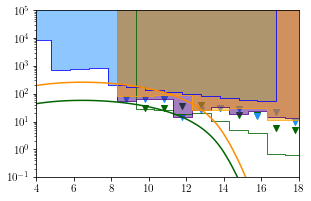

In [196]:
fig, ax = plot_tools.get_std_fig()
x_enu=np.linspace(0,16.3, 100)

# ax.scatter( bins_c, flux_limit, c='black', marker='v')

ax.scatter( bins_c_old, flux_limit_old, c='darkgreen', marker='v')
# ax.plot(x_enu, 1e-4*nuflux(x_enu), c='darkgreen')

# ax.scatter( bins_c_bor, flux_limit_bor, c='dodgerblue', marker='v')
# ax.plot(x_enu, 7.2e-5*nuflux(x_enu), c='dodgerblue')

ax.scatter(Kbins_c, Kflux_limit, c='dodgerblue', marker='v')


# ax.fill_between(np.append(Sbin_c-0.5,Sbin_c[-1]+0.5), np.append(Sfluxlimit,1e8), np.ones(np.size(Sbin_c)+1)*1e10, step = 'post', lw=0.0, alpha=0.5, color='darkgreen')
ax.fill_between(np.append(Kbin_c-0.5,Kbin_c[-1]+0.5), np.append(Kfluxlimit,1e8), np.ones(np.size(Kbin_c)+1)*1e10, step = 'post', lw=0.0, alpha=0.5, color='indigo')
ax.fill_between(np.append(Bbin_c-0.5,Bbin_c[-1]+0.5), np.append(Bfluxlimit,1e8), np.ones(np.size(Bbin_c)+1)*1e10, step = 'post', lw=0.0, alpha=0.5, color='dodgerblue')
ax.fill_between(np.append(0.0,np.append(Nbins_c-1,Nbins_c[-1]+1)), np.append(1e8,np.append(Nflux_limit,1e8)), np.ones(np.size(Nbins_c)+2)*1e10, step = 'post', lw=0.0, alpha=0.5, color='orange')

ax.step(np.append(0.0,np.append(Sbin_c-0.5,Sbin_c[-1]+0.5)), np.append(1e8,np.append(Sfluxlimit,1e8)), where = 'post', color='darkgreen', lw=0.8)
ax.step(np.append(0.0,np.append(Kbin_c-0.5,Kbin_c[-1]+0.5)), np.append(1e8,np.append(Kfluxlimit,1e8)), where = 'post', color='indigo', lw=0.8)
ax.step(np.append(0.0,np.append(Bbin_c-0.5,Bbin_c[-1]+0.5)), np.append(1e8,np.append(Bfluxlimit,1e8)), where = 'post', color='blue', lw=0.8)
ax.step(np.append(0.0,np.append(Nbins_c-1.0,Nbins_c[-1]+1.0)), np.append(1e8,np.append(Nflux_limit,1e8)), where = 'post', color='orange', lw=0.8)

ax.plot(x_enu, 3.6e-4*nuflux(x_enu), c='darkorange')
ax.plot(x_enu, 8e-5*nuflux(x_enu), c='darkgreen')

plt.yscale("log")
plt.xlim(4,18)
plt.ylim(0.1,1e5)


In [191]:
flux_limit_old/Sfluxlimit

array([1.23805873, 1.31766291, 2.01824258, 2.28583023, 3.14963231,
       4.42727853, 5.01068599, 7.38915372, 8.23182244, 7.20661477,
       5.67385679, 6.69362343, 9.22828129, 8.51514756, 6.73171974,
       6.91758853, 9.5109461 , 9.19964319, 7.06741935, 9.38024167,
       9.19230681, 7.72514073])

<ipython-input-285-ae6aba632cf7>:85: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('plots/Fluxlimit_'+boson_file+'_v2.pdf',rasterized=True)


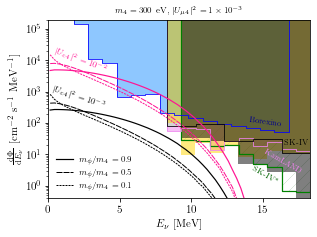

In [285]:
################################################################
# PLOTTING THE EVENT RATES 
################################################################
fsize=11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
matplotlib.rcParams['hatch.linewidth'] = 0.1  # previous pdf hatch linewidth

rcParams.update(rcparams)
axes_form  = [0.15,0.15,0.82,0.75]
fig = plt.figure()
ax = fig.add_axes(axes_form)

# E = np.linspace(0.001,13.5,1000)


##########################################################################
if params.model == const.VECTOR:
	boson_string = r'$m_{Z^\prime}$'
	boson_file = 'vector'
elif params.model == const.SCALAR:
	boson_string = r'$m_\phi$'
	boson_file = 'scalar'

ax.fill_between(np.append(Sbin_c-0.5,Sbin_c[-1]+0.5), np.append(Sfluxlimit,1e8), np.ones(np.size(Sbin_c)+1)*1e10, step = 'post', lw=0.05, fc='None', ec='darkgreen', alpha=1, hatch='//')
ax.fill_between(np.append(Kbin_c-0.5,Kbin_c[-1]+0.5), np.append(Kfluxlimit,1e8), np.ones(np.size(Kbin_c)+1)*1e10, step = 'post', lw=0.0, alpha=0.5, color='violet')
ax.fill_between(np.append(0.0,np.append(Nbins_c-1,Nbins_c[-1]+1)), np.append(1e8,np.append(Nflux_limit,1e8)), 
                np.ones(np.size(Nbins_c)+2)*1e10, step = 'post', lw=0.0, color='lightgrey', alpha=1)
ax.fill_between(np.append(Bbin_c-0.5,Bbin_c[-1]+0.5), np.append(Bfluxlimit,1e8), np.ones(np.size(Bbin_c)+1)*1e10, step = 'post', lw=0.0, alpha=0.5, color='dodgerblue')

ax.step(np.append(0.0,np.append(Sbin_c-0.5,Sbin_c[-1]+0.5)), np.append(1e8,np.append(Sfluxlimit,1e8)), where = 'post', color='green', lw=1.2)
ax.step(np.append(0.0,np.append(Kbin_c-0.5,Kbin_c[-1]+0.5)), np.append(1e8,np.append(Kfluxlimit,1e8)), where = 'post', color='violet', lw=0.8)
ax.step(np.append(0.0,np.append(Bbin_c-0.5,Bbin_c[-1]+0.5)), np.append(1e8,np.append(Bfluxlimit,1e8)), where = 'post', color='blue', lw=0.8)
ax.step(np.append(0.0,np.append(Nbins_c-1.0,Nbins_c[-1]+1.0)), np.append(1e8,np.append(Nflux_limit,1e8)), 
        where = 'post', color='black', lw=0.8)


ax.plot(bin_c, dNCASCADE/dx*1e38, lw=1.2, color='black', label=boson_string+r'/$m_4 = 0.9$')
ax.plot(bin_c, dNCASCADE2/dx*1e38, lw=1, dashes = (6,1), color='black', label=boson_string+r'/$m_4 = 0.5$')
ax.plot(bin_c, dNCASCADE3/dx*1e38, lw=1, dashes = (2,1), color='black', label=boson_string+r'/$m_4 = 0.1$')

ax.plot(bin_c, dNCASCADE_001/dx*1e38, lw=1.2, color='deeppink')
ax.plot(bin_c, dNCASCADE2_001/dx*1e38, lw=1, dashes = (6,1), color='deeppink')
ax.plot(bin_c, dNCASCADE3_001/dx*1e38, lw=1, dashes = (2,1), color='deeppink')


ax.text(0.4,0.4e4,r'$|U_{e4}|^2=10^{-2}$',fontsize=8.5,color='deeppink',rotation=-20)
ax.text(0.3,3e2,r'$|U_{e4}|^2=10^{-3}$',fontsize=8.5,color='black',rotation=-18)

##############
# STYLE
ax.set_yscale('log')

def to_scientific_notation(number):
    a, b = '{:.4E}'.format(number).split('E')
    b = int(b)
    a = float(a)
    return r'$%.0f \times 10^{%i}$'%(a,b)
UQSR = to_scientific_notation(params.Umu4**2)
ax.legend(loc='lower left',frameon=False,ncol=1,markerfirst=True,fontsize=8.5)
ax.set_title(r'$m_4 = %.0f$ eV, $|U_{\mu 4}|^2 = \,$'%(params.m4*1e9)+UQSR, fontsize=8.5)

ax.set_xlim(0,18.3)
ax.set_ylim(0.4, 2e5)

ax.set_ylabel(r'$\frac{{\rm d}\Phi}{{\rm d}E_\nu}$ [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax.set_xlabel(r'$E_\nu$ [MeV]')



# ax.scatter(Kbins_c, Kflux_limit, c='dodgerblue', marker='x',s=40)
# ax.scatter( bins_c_old, flux_limit_old, c='darkgreen', marker='v')
ax.text(15.,2.5,r'KamLAND',fontsize=8,color='violet', rotation = -30)
ax.text(14.2,1.2,r'SK-IV*',fontsize=8,color='darkgreen', rotation = -30)
ax.text(16.5,2e1,r'SK-IV',fontsize=8,color='black',rotation=0)
ax.text(14.0,0.8e2,r'Borexino',fontsize=8,color='darkblue', rotation = -8)


ax.fill_between(np.append(K21_bin_c-0.5,K21_bin_c[-1]+0.5), np.append(K21_fluxlimit,1e8), np.ones(np.size(K21_bin_c)+1)*1e10, step = 'post', lw=0.0, alpha=0.5, color='gold')
ax.fill_between(np.append(S15_bin_c-1,S15_bin_c[-1]+1), np.append(S15_fluxlimit,1e8), np.ones(np.size(S15_bin_c)+1)*1e10, step = 'post', lw=0.0, alpha=0.5, color='black')


fig.savefig('plots/Fluxlimit_'+boson_file+'_v2.pdf',rasterized=True)